In [1]:
from import_data_encoded_knn import *

X_try, X_train, X_test, y_train, y_test, len_X_train = import_data_encoded(encoding = 'binary')

# KNN (lavoro precedente)

In [8]:
from sequence_distance_matrix import *
from time import ctime
categorical = ['ring_number', "exposure_type", "conc1_type","species",'tripleBond', 'obs_duration_mean', 'doubleBond',
    'alone_atom_number', 'class', 'tax_order', 'family', 'genus', 'oh_count']

non_categorical =[ 'atom_number', 'bonds_number', 'Mol', 'MorganDensity', 'LogP']
print(ctime())
dist_matr = basic_matrix(X_try, categorical, non_categorical)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

Fri Jul 24 11:55:53 2020
Fri Jul 24 12:00:26 2020


In [35]:
from math import sqrt
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score


# LEAF_SIZE FISSATA A 60
accs_train = []
accs_test = []

rmse_train = []
rmse_test = []

auc_train = []
auc_test = []

rec_train = []
rec_test = []

prec_train = []
prec_test = []

for k in [i for i in range(1,13,1)] + [i for i in range(13,52,2)]:
    print(k, end =' ')
    neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors = k, leaf_size = 60)
    neigh.fit(X_train_new, y_train.ravel())
    y_pred_train = neigh.predict(X_train_new)
    y_pred = neigh.predict(X_test_new)
    
    accs_train.append(accuracy_score(y_train, y_pred_train))
    accs_test.append(accuracy_score(y_test, y_pred))
    
    rmse_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(sqrt(mean_squared_error(y_test, y_pred)))
    
    auc_train.append(roc_auc_score(y_train, y_pred_train))
    auc_test.append(roc_auc_score(y_test, y_pred))
    
    rec_train.append(recall_score(y_train,y_pred_train))
    rec_test.append(recall_score(y_test, y_pred))
    
    prec_train.append(precision_score(y_train, y_pred_train))
    prec_test.append(precision_score(y_test, y_pred))

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [46]:
tab_pre = pd.DataFrame({'acc_train': accs_train, 'acc_test': accs_test,
                        'rmse_train': rmse_train, 'rmse_test': rmse_test,
                        'auc_train': auc_train, 'auc_test': auc_test,
                        'recall_train': rec_train, 'recall_test':rec_test,
                        'precision_train': prec_train, 'precision_test': prec_test},
                      index = ['k = ' + str(i) for i in range(1,13,1)] + ['k = ' + str(i) for i in range(13,52,2)])
tab_pre

,acc_train,acc_test,rmse_train,rmse_test,auc_train,auc_test,recall_train,recall_test,precision_train,precision_test
k = 1,0.998720,0.904898,0.035777,0.308386,0.998482,0.899297,0.999391,0.919796,0.998581,0.930045
k = 2,0.950720,0.880733,0.221991,0.345351,0.960794,0.892056,0.922281,0.850612,0.999560,0.957281
k = 3,0.947904,0.894115,0.228245,0.325400,0.943431,0.888450,0.960532,0.909184,0.957036,0.923316
k = 4,0.929536,0.878264,0.265451,0.348906,0.933220,0.881371,0.919136,0.870000,0.967532,0.934254
k = 5,0.923200,0.882032,0.277128,0.343465,0.915044,0.871978,0.946226,0.908776,0.932973,0.906186
k = 6,0.912320,0.868780,0.296108,0.362243,0.911092,0.867171,0.915787,0.873061,0.943550,0.916845
k = 7,0.906624,0.874107,0.305575,0.354814,0.896981,0.864910,0.933847,0.898571,0.919389,0.903179
k = 8,0.898240,0.863323,0.318998,0.369698,0.894360,0.860430,0.909192,0.871020,0.928024,0.910410
k = 9,0.893952,0.866831,0.325650,0.364923,0.881977,0.856050,0.927760,0.895510,0.906334,0.895327
k = 10,0.887808,0.859036,0.334951,0.375452,0.880089,0.853226,0.909598,0.874490,0.912282,0.901157


In [47]:
tab_pre.to_csv('results/tab_knn_lavoro_precedente.csv')

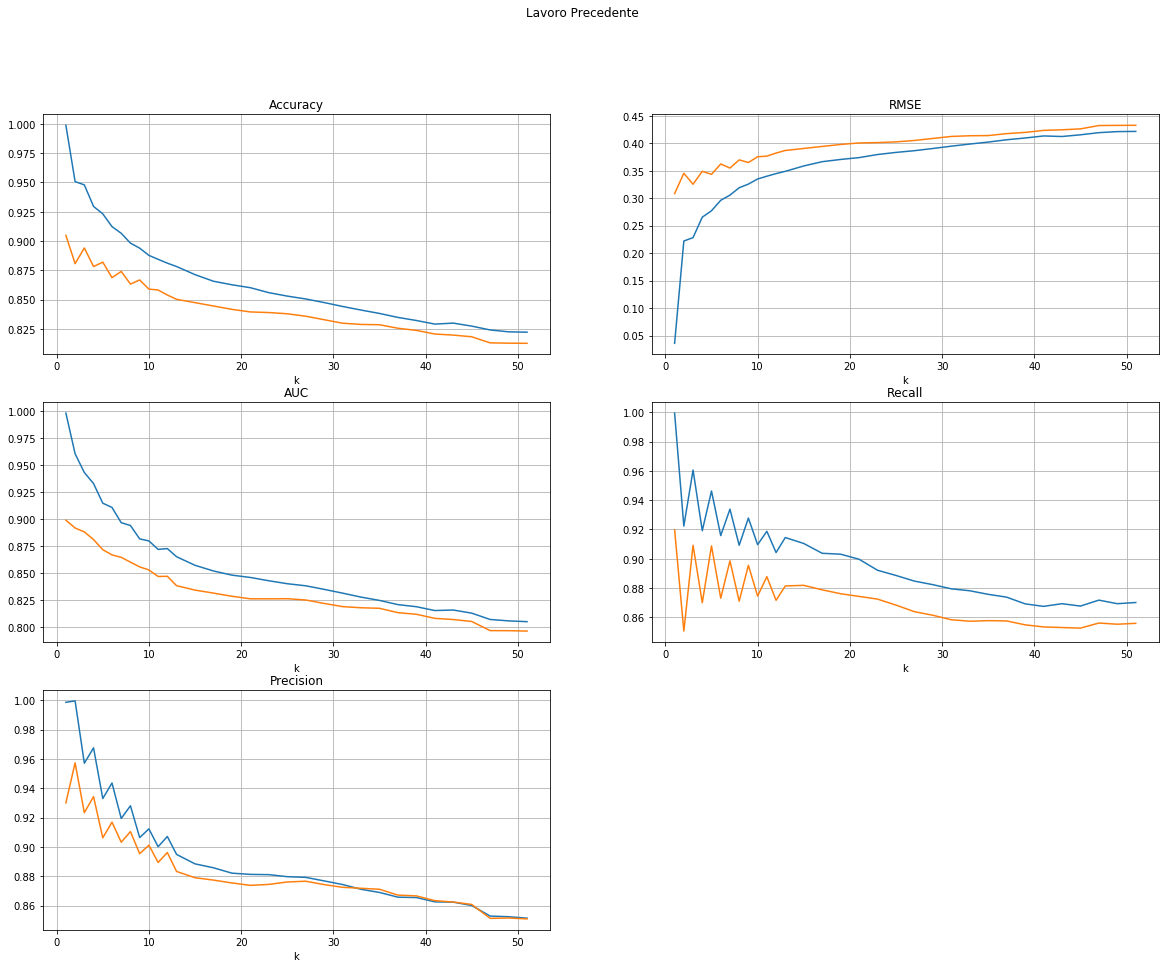

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tab_pre = pd.read_csv('results/tab_knn_lavoro_precedente.csv')

k = [i for i in range(1,13,1)] + [i for i in range(13,52,2)]

plt.figure(figsize = [20,15])
plt.subplot(3,2,1)
plt.suptitle('Lavoro Precedente')

plt.plot(k, tab_pre.acc_train)
plt.plot(k, tab_pre.acc_test)
plt.grid()
plt.xlabel('k')
plt.title('Accuracy')

plt.subplot(3,2,2)
plt.plot(k,tab_pre.rmse_train)
plt.plot(k,tab_pre.rmse_test)
plt.grid()
plt.xlabel('k')
plt.title('RMSE')

plt.subplot(3,2,3)
plt.plot(k, tab_pre.auc_train)
plt.plot(k, tab_pre.auc_test)
plt.grid()
plt.xlabel('k')
plt.title('AUC')

plt.subplot(3,2,4)
plt.plot(k, tab_pre.recall_train)
plt.plot(k, tab_pre.recall_test)
plt.grid()
plt.xlabel('k')
plt.title('Recall')

plt.subplot(3,2,5)
plt.plot(k, tab_pre.precision_train)
plt.plot(k, tab_pre.precision_test)
plt.grid()
plt.xlabel('k')
plt.title('Precision')

# plt.savefig('results/plot_lavoro_precedente')
plt.show()

# KNN (Pubchem2d)

In [2]:
from import_data_encoded_knn import *
from sequence_distance_matrix import *
from time import ctime

X_try, X_train, X_test, y_train, y_test, len_X_train = import_data_encoded(encoding = 'binary')

print(ctime())
dist_matr = pubchem2d_matrix(X_try)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

Fri Jul 24 12:50:52 2020
Fri Jul 24 13:03:09 2020


In [5]:
from math import sqrt
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
# LEAF_SIZE FISSATA A 60
accs_train = []
accs_test = []

rmse_train = []
rmse_test = []

auc_train = []
auc_test = []

rec_train = []
rec_test = []

prec_train = []
prec_test = []

for k in [i for i in range(1,13,1)] + [i for i in range(13,52,2)]:
    print(k, end = ' ')
    neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors = k, leaf_size = 60)
    neigh.fit(X_train_new, y_train.ravel())
    y_pred_train = neigh.predict(X_train_new)
    y_pred = neigh.predict(X_test_new)
    
    accs_train.append(accuracy_score(y_train, y_pred_train))
    accs_test.append(accuracy_score(y_test, y_pred))
    
    rmse_train.append(sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(sqrt(mean_squared_error(y_test, y_pred)))
    
    auc_train.append(roc_auc_score(y_train, y_pred_train))
    auc_test.append(roc_auc_score(y_test, y_pred))
    
    rec_train.append(recall_score(y_train,y_pred_train))
    rec_test.append(recall_score(y_test, y_pred))
    
    prec_train.append(precision_score(y_train, y_pred_train))
    prec_test.append(precision_score(y_test, y_pred))

tab_pub = pd.DataFrame({'acc_train': accs_train, 'acc_test': accs_test,
                        'rmse_train': rmse_train, 'rmse_test': rmse_test,
                        'auc_train': auc_train, 'auc_test': auc_test,
                        'recall_train': rec_train, 'recall_test':rec_test,
                        'precision_train': prec_train, 'precision_test': prec_test},
                      index = ['k = ' + str(i) for i in range(1,13,1)] + ['k = ' + str(i) for i in range(13,52,2)])
tab_pub

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

,acc_train,acc_test,rmse_train,rmse_test,auc_train,auc_test,recall_train,recall_test,precision_train,precision_test
k = 1,0.853824,0.826296,0.382330,0.416778,0.845640,0.817308,0.876928,0.850204,0.889747,0.873558
k = 2,0.844160,0.812914,0.394766,0.432534,0.861736,0.832193,0.794541,0.761633,0.950249,0.932068
k = 3,0.873728,0.850981,0.355348,0.386030,0.861885,0.838844,0.907163,0.883265,0.894189,0.882725
k = 4,0.855872,0.830453,0.379642,0.411760,0.851433,0.827939,0.868405,0.837143,0.899622,0.889998
k = 5,0.862144,0.840457,0.371290,0.399428,0.840411,0.819607,0.923498,0.895918,0.866692,0.859436
k = 6,0.865664,0.843965,0.366519,0.395012,0.860955,0.839702,0.878957,0.855306,0.905319,0.894939
k = 7,0.851200,0.833052,0.385746,0.408593,0.827711,0.811336,0.917512,0.890816,0.856750,0.853372
k = 8,0.870080,0.852150,0.360444,0.384512,0.864312,0.847435,0.886364,0.864694,0.905660,0.899194
k = 9,0.864256,0.843965,0.368435,0.395012,0.852400,0.831109,0.897727,0.878163,0.888264,0.876911
k = 10,0.865536,0.845524,0.366693,0.393034,0.857440,0.837627,0.888393,0.866531,0.897407,0.888099


In [6]:
tab_pub.to_csv('results/tab_knn_pubchem2d.csv')

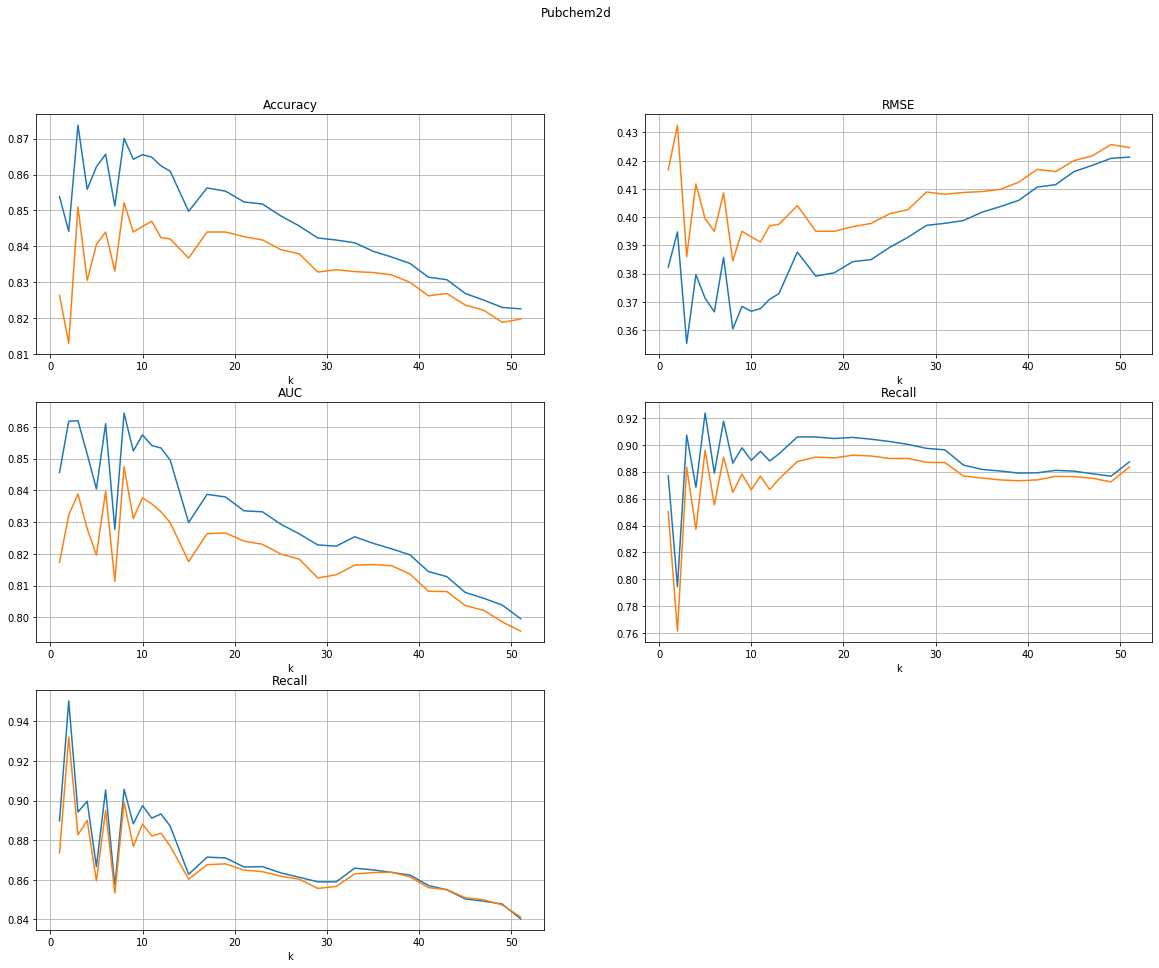

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tab_pub = pd.read_csv('results/tab_knn_pubchem2d.csv')

k = [i for i in range(1,13,1)] + [i for i in range(13,52,2)]

plt.figure(figsize = [20,15])
plt.subplot(3,2,1)
plt.suptitle('Pubchem2d')

plt.plot(k, tab_pub.acc_train)
plt.plot(k, tab_pub.acc_test)
plt.grid()
plt.xlabel('k')
plt.title('Accuracy')

plt.subplot(3,2,2)
plt.plot(k,tab_pub.rmse_train)
plt.plot(k,tab_pub.rmse_test)
plt.grid()
plt.xlabel('k')
plt.title('RMSE')

plt.subplot(3,2,3)
plt.plot(k, tab_pub.auc_train)
plt.plot(k, tab_pub.auc_test)
plt.grid()
plt.xlabel('k')
plt.title('AUC')

plt.subplot(3,2,4)
plt.plot(k, tab_pub.recall_train)
plt.plot(k, tab_pub.recall_test)
plt.grid()
plt.xlabel('k')
plt.title('Recall')

plt.subplot(3,2,5)
plt.plot(k, tab_pub.precision_train)
plt.plot(k, tab_pub.precision_test)
plt.grid()
plt.xlabel('k')
plt.title('Recall')

# Da salvare
plt.show()

# KNN (Tanimoto)

In [7]:
import textdistance

In [25]:
textdistance.jaccard.distance(X_try.pubchem2d.iloc[0], X_try.pubchem2d.iloc[1])

0.06160616061606161